In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [4]:
import torchvision
from torchvision import datasets, transforms

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Initialise data transformers
transformers=transforms.Compose([
                        transforms.ToTensor()])

In [8]:
def data_load(train_batch_size, test_batch_size):
    train_data_loader = torch.utils.data.DataLoader(
                            datasets.MNIST(root='data',train=True,download=True, transform=transformers),
                            batch_size=train_batch_size, shuffle=True)
    
    test_data_loader = torch.utils.data.DataLoader(
                            datasets.MNIST(root='data',train=False,download=True, transform= transformers),
                            batch_size=test_batch_size, shuffle=True)
    
    return (train_data_loader,test_data_loader)

In [9]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(784, 18)
        self.linear_2 = nn.Linear(18, 20)
        self.linear_3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        x = self.linear_3(x)
        return x

In [10]:
def train_model(model, train_data, optimizer):
    model.train()
    loss_arr = []
    accuracy_arr = []
    epoch_range = 40
    total_df=pd.DataFrame()
    
    for epoch in range(epoch_range):
        total_loss = 0
        total_samples = 0
        correct_samples = 0
        print("Training Epoch - ",epoch+1)

        for index,(data, target) in enumerate(train_data):
            optimizer.zero_grad()
            #Transform the input
            data = data.view(-1, 784)
            prediction = model(data)
            
            loss = loss_func(prediction, target)
            loss.backward()
            optimizer.step()
            # Calculate the total loss for each epoch
            total_loss = total_loss + loss.data
            
            #Calculate the total accuracy for each epoch
            total_samples += target.size(0)
            prediction_data = np.argmax(prediction.data, axis=1)
            correct_samples += (prediction_data == target).sum().item()
    
        accuracy=(correct_samples/total_samples)*100
        
        loss_arr.append(total_loss)
        accuracy_arr.append(round(accuracy,3))
        print('Accuracy - ', accuracy)
        print('Round acc - ', round(accuracy,3))
                
        # Store the weights
        df = pd.DataFrame()
        for name, parameter in model.named_parameters():
            if 'weight' in name:
                ws=torch.nn.utils.parameters_to_vector(parameter).detach().numpy()
                df = pd.concat([df, pd.DataFrame(ws).T], axis = 1)
        
        total_df = pd.concat([total_df, df], axis = 0)

    return loss_arr, accuracy_arr, total_df

In [31]:
train_data, test_data= data_load(1000,1000)
loss_func = nn.CrossEntropyLoss()
total_w_df=pd.DataFrame()
total_accuracy = []
total_loss = []

for i in range(8):
    print('Training loop - ', i)
    model = Model()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_arr, accuracy_arr, w_df = train_model(model, train_data, optimizer)
    print('Acc - ',loss_arr)
    total_loss.extend(loss_arr)
    total_accuracy.extend(accuracy_arr)
    total_w_df = total_w_df.append(w_df)

Training loop -  0
Training Epoch -  1
Accuracy -  76.3
Round acc -  76.3
Training Epoch -  2
Accuracy -  91.91333333333334
Round acc -  91.913
Training Epoch -  3
Accuracy -  93.345
Round acc -  93.345
Training Epoch -  4
Accuracy -  94.315
Round acc -  94.315
Training Epoch -  5
Accuracy -  94.92833333333334
Round acc -  94.928
Training Epoch -  6
Accuracy -  95.40166666666666
Round acc -  95.402
Training Epoch -  7
Accuracy -  95.56166666666667
Round acc -  95.562
Training Epoch -  8
Accuracy -  95.765
Round acc -  95.765
Training Epoch -  9
Accuracy -  96.00333333333333
Round acc -  96.003
Training Epoch -  10
Accuracy -  96.19
Round acc -  96.19
Training Epoch -  11
Accuracy -  96.21166666666666
Round acc -  96.212
Training Epoch -  12
Accuracy -  96.46666666666667
Round acc -  96.467
Training Epoch -  13
Accuracy -  96.63833333333334
Round acc -  96.638
Training Epoch -  14
Accuracy -  96.745
Round acc -  96.745
Training Epoch -  15
Accuracy -  96.60166666666666
Round acc -  96.6

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  76.03666666666666
Round acc -  76.037
Training Epoch -  2
Accuracy -  91.905
Round acc -  91.905
Training Epoch -  3
Accuracy -  92.89500000000001
Round acc -  92.895
Training Epoch -  4
Accuracy -  93.77666666666667
Round acc -  93.777
Training Epoch -  5
Accuracy -  94.525
Round acc -  94.525
Training Epoch -  6
Accuracy -  94.94333333333333
Round acc -  94.943
Training Epoch -  7
Accuracy -  95.21833333333333
Round acc -  95.218
Training Epoch -  8
Accuracy -  95.42500000000001
Round acc -  95.425
Training Epoch -  9
Accuracy -  95.655
Round acc -  95.655
Training Epoch -  10
Accuracy -  95.79333333333334
Round acc -  95.793
Training Epoch -  11
Accuracy -  96.01833333333335
Round acc -  96.018
Training Epoch -  12
Accuracy -  96.12833333333334
Round acc -  96.128
Training Epoch -  13
Accuracy -  96.09833333333333
Round acc -  96.098
Training Epoch -  14
Accuracy -  96.41
Round acc -  96.41
Training Epoch -  15
Accuracy -  96.32
Round acc -  96.32
Training Epoch -  16
Ac

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  76.42999999999999
Round acc -  76.43
Training Epoch -  2
Accuracy -  91.865
Round acc -  91.865
Training Epoch -  3
Accuracy -  93.35
Round acc -  93.35
Training Epoch -  4
Accuracy -  94.065
Round acc -  94.065
Training Epoch -  5
Accuracy -  94.55333333333333
Round acc -  94.553
Training Epoch -  6
Accuracy -  95.14833333333334
Round acc -  95.148
Training Epoch -  7
Accuracy -  95.38333333333333
Round acc -  95.383
Training Epoch -  8
Accuracy -  95.71
Round acc -  95.71
Training Epoch -  9
Accuracy -  95.77166666666666
Round acc -  95.772
Training Epoch -  10
Accuracy -  96.055
Round acc -  96.055
Training Epoch -  11
Accuracy -  96.38
Round acc -  96.38
Training Epoch -  12
Accuracy -  96.46333333333334
Round acc -  96.463
Training Epoch -  13
Accuracy -  96.41333333333333
Round acc -  96.413
Training Epoch -  14
Accuracy -  96.72333333333333
Round acc -  96.723
Training Epoch -  15
Accuracy -  96.85666666666667
Round acc -  96.857
Training Epoch -  16
Accuracy -  96.8

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  79.22166666666666
Round acc -  79.222
Training Epoch -  2
Accuracy -  91.79166666666667
Round acc -  91.792
Training Epoch -  3
Accuracy -  92.97
Round acc -  92.97
Training Epoch -  4
Accuracy -  93.94666666666667
Round acc -  93.947
Training Epoch -  5
Accuracy -  94.48333333333333
Round acc -  94.483
Training Epoch -  6
Accuracy -  94.96666666666667
Round acc -  94.967
Training Epoch -  7
Accuracy -  95.32000000000001
Round acc -  95.32
Training Epoch -  8
Accuracy -  95.60499999999999
Round acc -  95.605
Training Epoch -  9
Accuracy -  95.91666666666666
Round acc -  95.917
Training Epoch -  10
Accuracy -  96.03666666666668
Round acc -  96.037
Training Epoch -  11
Accuracy -  96.23833333333334
Round acc -  96.238
Training Epoch -  12
Accuracy -  96.275
Round acc -  96.275
Training Epoch -  13
Accuracy -  96.50166666666667
Round acc -  96.502
Training Epoch -  14
Accuracy -  96.575
Round acc -  96.575
Training Epoch -  15
Accuracy -  96.73333333333333
Round acc -  96.733


/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  77.395
Round acc -  77.395
Training Epoch -  2
Accuracy -  92.24666666666667
Round acc -  92.247
Training Epoch -  3
Accuracy -  93.69166666666666
Round acc -  93.692
Training Epoch -  4
Accuracy -  94.55666666666667
Round acc -  94.557
Training Epoch -  5
Accuracy -  95.31166666666667
Round acc -  95.312
Training Epoch -  6
Accuracy -  95.59666666666666
Round acc -  95.597
Training Epoch -  7
Accuracy -  96.015
Round acc -  96.015
Training Epoch -  8
Accuracy -  96.04333333333334
Round acc -  96.043
Training Epoch -  9
Accuracy -  96.26333333333334
Round acc -  96.263
Training Epoch -  10
Accuracy -  96.43
Round acc -  96.43
Training Epoch -  11
Accuracy -  96.44333333333334
Round acc -  96.443
Training Epoch -  12
Accuracy -  96.60166666666666
Round acc -  96.602
Training Epoch -  13
Accuracy -  96.75666666666667
Round acc -  96.757
Training Epoch -  14
Accuracy -  96.78333333333333
Round acc -  96.783
Training Epoch -  15
Accuracy -  96.94500000000001
Round acc -  96.945

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  77.66666666666666
Round acc -  77.667
Training Epoch -  2
Accuracy -  91.76166666666667
Round acc -  91.762
Training Epoch -  3
Accuracy -  93.13166666666667
Round acc -  93.132
Training Epoch -  4
Accuracy -  93.93
Round acc -  93.93
Training Epoch -  5
Accuracy -  94.48166666666667
Round acc -  94.482
Training Epoch -  6
Accuracy -  94.985
Round acc -  94.985
Training Epoch -  7
Accuracy -  95.155
Round acc -  95.155
Training Epoch -  8
Accuracy -  95.30666666666666
Round acc -  95.307
Training Epoch -  9
Accuracy -  95.63333333333334
Round acc -  95.633
Training Epoch -  10
Accuracy -  95.71
Round acc -  95.71
Training Epoch -  11
Accuracy -  95.93166666666667
Round acc -  95.932
Training Epoch -  12
Accuracy -  96.095
Round acc -  96.095
Training Epoch -  13
Accuracy -  96.155
Round acc -  96.155
Training Epoch -  14
Accuracy -  96.32833333333333
Round acc -  96.328
Training Epoch -  15
Accuracy -  96.44500000000001
Round acc -  96.445
Training Epoch -  16
Accuracy -  9

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  78.61333333333333
Round acc -  78.613
Training Epoch -  2
Accuracy -  92.17999999999999
Round acc -  92.18
Training Epoch -  3
Accuracy -  93.28
Round acc -  93.28
Training Epoch -  4
Accuracy -  94.045
Round acc -  94.045
Training Epoch -  5
Accuracy -  94.65666666666667
Round acc -  94.657
Training Epoch -  6
Accuracy -  95.21166666666666
Round acc -  95.212
Training Epoch -  7
Accuracy -  95.61333333333333
Round acc -  95.613
Training Epoch -  8
Accuracy -  95.73833333333333
Round acc -  95.738
Training Epoch -  9
Accuracy -  95.91499999999999
Round acc -  95.915
Training Epoch -  10
Accuracy -  96.2
Round acc -  96.2
Training Epoch -  11
Accuracy -  96.30333333333333
Round acc -  96.303
Training Epoch -  12
Accuracy -  96.50666666666666
Round acc -  96.507
Training Epoch -  13
Accuracy -  96.48333333333333
Round acc -  96.483
Training Epoch -  14
Accuracy -  96.655
Round acc -  96.655
Training Epoch -  15
Accuracy -  96.71833333333333
Round acc -  96.718
Training Epoch 

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


Accuracy -  77.73833333333333
Round acc -  77.738
Training Epoch -  2
Accuracy -  91.54166666666667
Round acc -  91.542
Training Epoch -  3
Accuracy -  92.97
Round acc -  92.97
Training Epoch -  4
Accuracy -  93.70666666666668
Round acc -  93.707
Training Epoch -  5
Accuracy -  94.20166666666667
Round acc -  94.202
Training Epoch -  6
Accuracy -  94.67833333333333
Round acc -  94.678
Training Epoch -  7
Accuracy -  94.85166666666667
Round acc -  94.852
Training Epoch -  8
Accuracy -  95.24333333333334
Round acc -  95.243
Training Epoch -  9
Accuracy -  95.44666666666667
Round acc -  95.447
Training Epoch -  10
Accuracy -  95.55666666666667
Round acc -  95.557
Training Epoch -  11
Accuracy -  95.91166666666666
Round acc -  95.912
Training Epoch -  12
Accuracy -  96.05666666666667
Round acc -  96.057
Training Epoch -  13
Accuracy -  96.09666666666666
Round acc -  96.097
Training Epoch -  14
Accuracy -  96.29333333333334
Round acc -  96.293
Training Epoch -  15
Accuracy -  96.273333333333

/var/folders/1z/_dfyz4ld301cjhg8930248pm0000gn/T/ipykernel_12189/2565151355.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_w_df = total_w_df.append(w_df)


In [33]:
df=np.array(total_w_df)
print(total_w_df.shape)
pca = PCA(n_components=2)
pca_ = pca.fit_transform(df)
pca_df=pd.DataFrame(pca_,columns=['x','y'])
print(pca_df.shape)
print(total_accuracy)
pca_df["accuracy"]=total_accuracy
pca_df["loss"]=total_loss
print(pca_df)

(320, 14672)
(320, 2)
[76.3, 91.913, 93.345, 94.315, 94.928, 95.402, 95.562, 95.765, 96.003, 96.19, 96.212, 96.467, 96.638, 96.745, 96.602, 96.755, 96.982, 96.885, 96.873, 97.07, 97.155, 97.243, 97.358, 97.29, 97.458, 97.485, 97.382, 97.46, 97.59, 97.55, 97.485, 97.728, 97.682, 97.7, 97.785, 97.757, 97.837, 97.903, 97.877, 98.075, 76.037, 91.905, 92.895, 93.777, 94.525, 94.943, 95.218, 95.425, 95.655, 95.793, 96.018, 96.128, 96.098, 96.41, 96.32, 96.415, 96.595, 96.56, 96.697, 96.722, 96.842, 96.87, 96.888, 96.85, 97.0, 97.012, 97.148, 97.033, 97.103, 97.355, 97.232, 97.172, 97.477, 97.497, 97.46, 97.435, 97.575, 97.59, 97.468, 97.525, 76.43, 91.865, 93.35, 94.065, 94.553, 95.148, 95.383, 95.71, 95.772, 96.055, 96.38, 96.463, 96.413, 96.723, 96.857, 96.887, 96.817, 96.975, 96.925, 97.062, 97.227, 97.265, 97.333, 97.228, 97.303, 97.387, 97.485, 97.48, 97.418, 97.543, 97.718, 97.66, 97.818, 97.803, 97.705, 97.907, 97.713, 97.858, 97.927, 97.972, 79.222, 91.792, 92.97, 93.947, 94.483, 94.

In [34]:
final_pca = pca_df.iloc[::3, :]
print(final_pca)

             x          y  accuracy             loss
0     2.548699   6.889667    76.300  tensor(45.9314)
3     6.241103  14.460173    94.315  tensor(11.6361)
6     8.871075  20.366388    95.562   tensor(8.8016)
9    11.166395  25.499271    96.190   tensor(7.6143)
12   13.306195  29.922668    96.638   tensor(6.7482)
..         ...        ...       ...              ...
306  12.798545   2.721848    97.013   tensor(5.7282)
309  13.304300   2.686786    97.217   tensor(5.3497)
312  13.791550   2.750782    97.088   tensor(5.4302)
315  14.321892   2.666153    97.298   tensor(5.0455)
318  14.723136   2.624203    97.437   tensor(4.6888)

[107 rows x 4 columns]


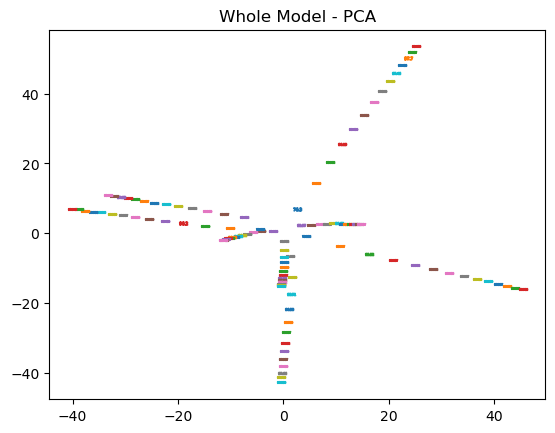

In [35]:
for i in range(final_pca.shape[0]):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("Whole Model - PCA")

In [68]:
layer_1 = total_w_df.iloc[ : , 0:9408]

In [69]:
df = layer_1
df = np.array(df)
pca = PCA(n_components=2)
new_data = pca.fit_transform(df)

In [70]:
df = pd.DataFrame(new_data, columns=['x','y'])
df['accuracy'] = total_accuracy
df['loss'] = total_loss
final_pca = df.iloc[::3, :]

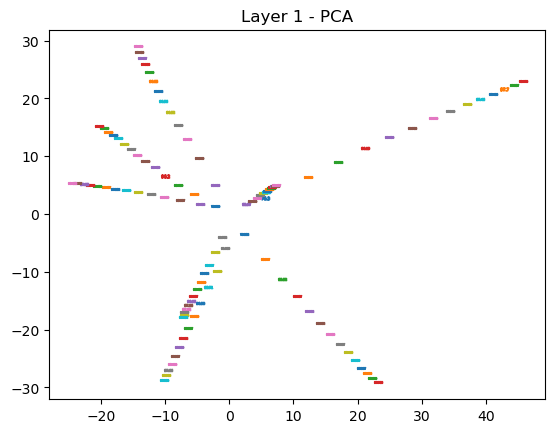

In [71]:
for i in range(107):
    m = list(final_pca['accuracy'])[i]
    plt.scatter(final_pca['x'][i*3], final_pca['y'][i*3], marker = f'${m}$')
    plt.title("Layer 1 - PCA")

In [72]:
param_model = Model()
total_params = sum(p.numel() for p in param_model.parameters())
print(total_params)

14720
